<h1 style="text-align: center;">Heart Disease Prediction | Logistic Regression</h1>
<h4 style="text-align: center;">Ghani Haider |  github.com/Ghani-Haider/</h4>

The [dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so creating a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

The dataset consist of following features/ attributes:
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Data

In [2]:
df = pd.read_csv('./data/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# target variable values
df['target'].unique()

array([1, 0])

## Exploratory Data Analysis and Visualization

Exploring the dataset to find missing data, creating statistical summary of the numerical features and finding trends and relationship among features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# statistical summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


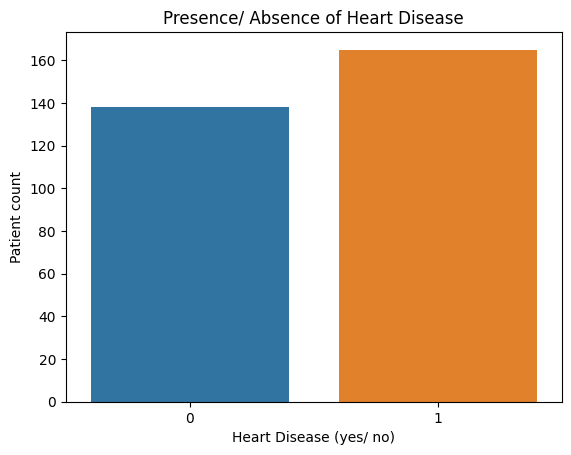

In [7]:
# target variable values
sns.countplot(x=df['target'])
plt.title('Presence/ Absence of Heart Disease')
plt.ylabel('Patient count')
plt.xlabel('Heart Disease (yes/ no)')
plt.show()

### Relationships between target and features

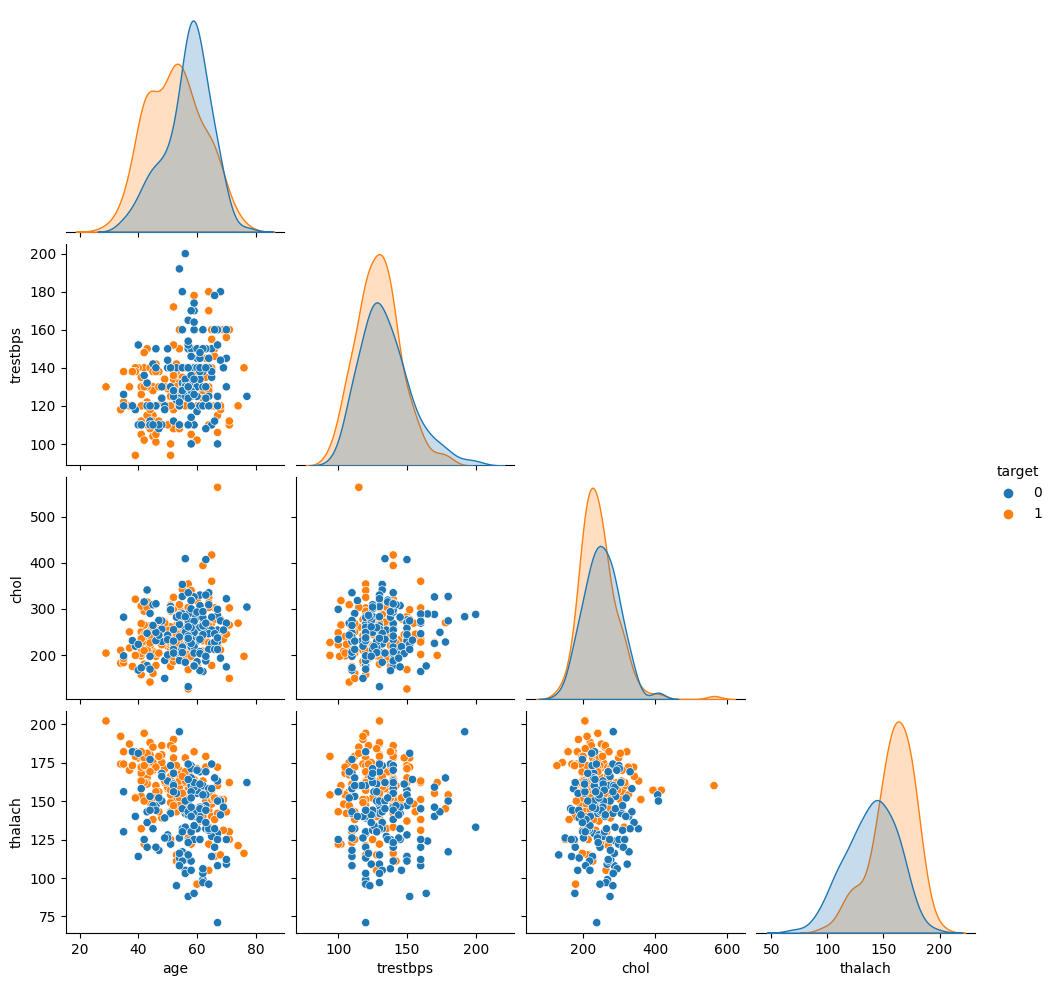

In [8]:
# plot feature & target relationship
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']], corner=True, diag_kind='kde', hue='target')
plt.show()

### Creating a heatmap to display the correlation between all the columns.

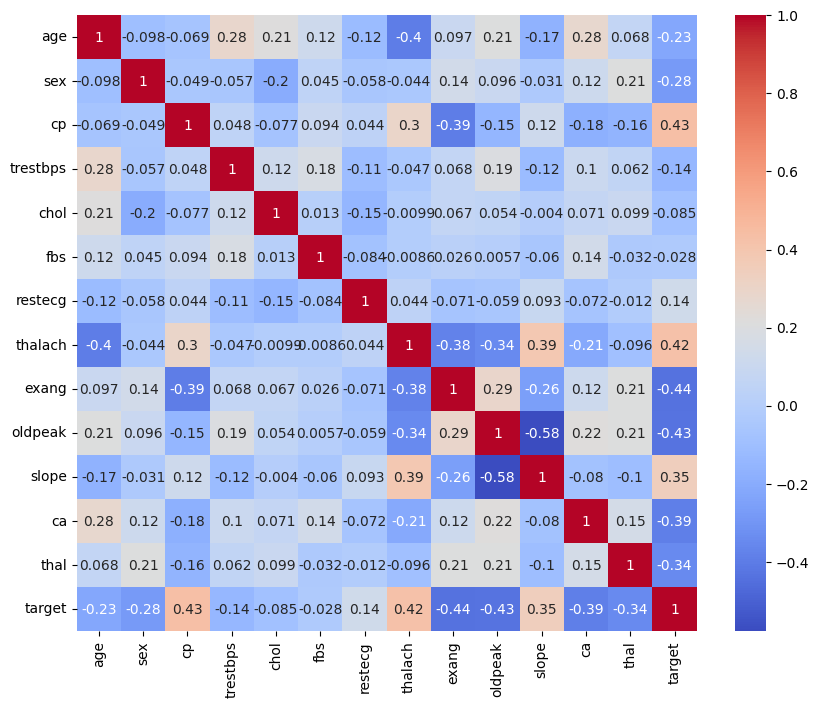

In [9]:
# heatmap of feature/target correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)
plt.show()

## Creating Classification Model

### Train Test Split and Scaling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# feature and target separation
X = df.drop('target', axis=1)
y = df['target']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

# scaling features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression Model
Using Logistic Regression model and Cross-Validation to find a well-performing C value for the hyper-parameter search.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model = LogisticRegression(solver='saga', max_iter=3000, multi_class='ovr')

# choosing different hyper-parameter values for cv
C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 10)

# parameter grid for optimal hyper-parameter value search
param_grid = {'C': C,
              'penalty': penalty,
              'l1_ratio': l1_ratio}

# grid search model
grid_model = GridSearchCV(log_model,
                          param_grid,
                          verbose=0)
# train
grid_model.fit(scaled_X_train, y_train)

/home/ghani/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/ghani/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/ghani/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/ghani/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/ghani/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/ghani/.lo

GridSearchCV(estimator=LogisticRegression(max_iter=3000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

Model's optimal parameters.

In [12]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

Model's coefficients.

In [13]:
grid_model.best_estimator_.coef_

array([[-0.04753855, -0.6964517 ,  0.88789632, -0.23919609, -0.18640093,
         0.00244364,  0.09594789,  0.42195091, -0.40860864, -0.52448861,
         0.35764607, -0.83283423, -0.56445329]])

**BONUS TASK: We didn't show this in the lecture notebooks, but you have the skills to do this! Create a visualization of the coefficients by using a barplot of their values. Even more bonus points if you can figure out how to sort the plot! If you get stuck on this, feel free to quickly view the solutions notebook for hints, there are many ways to do this, the solutions use a combination of pandas and seaborn.**

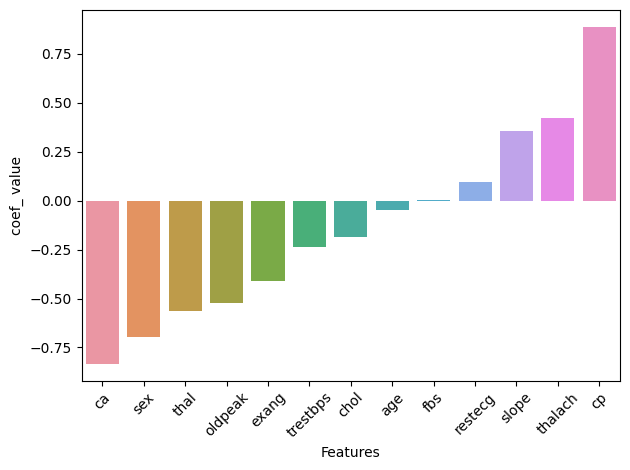

In [14]:
# get model's coefficient with feature names
coef_ = pd.Series(data=grid_model.best_estimator_.coef_[0], index=X_train.columns).sort_values()

# plot coef values
sns.barplot(x=coef_.index, y=coef_)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('coef_ value')
plt.tight_layout()
plt.show()

### Model Performance Evaluation

Evaluating the model on the test set. Creating the following evaluations results:
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report
* Precision Recall Curve and the ROC Curve

Confusion Matrix
[[12  3]
 [ 2 14]]

Classification Accuracy: 0.8387096774193549

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



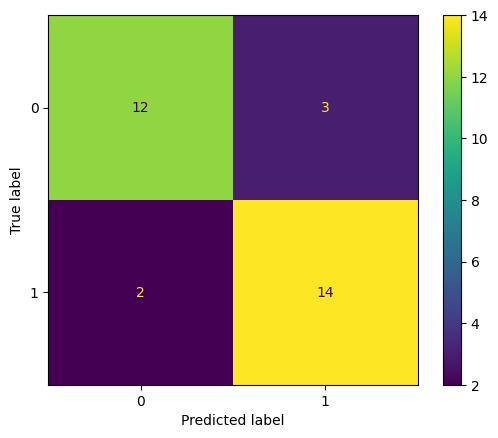

In [21]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# predict test set
y_pred = grid_model.predict(scaled_X_test)

# confusion matrix of test set
print(f"Confusion Matrix\n{confusion_matrix(y_test, y_pred)}\n")

# model accuracy
print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}\n")

# model classfication report
print(classification_report(y_test, y_pred))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

#### Performance Curves

Precision recall curve and the ROC curve.

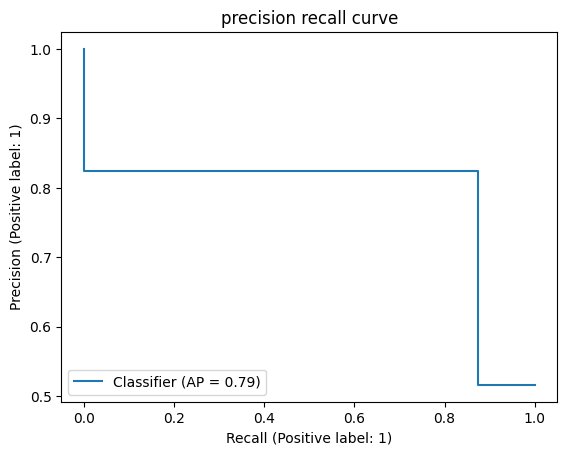

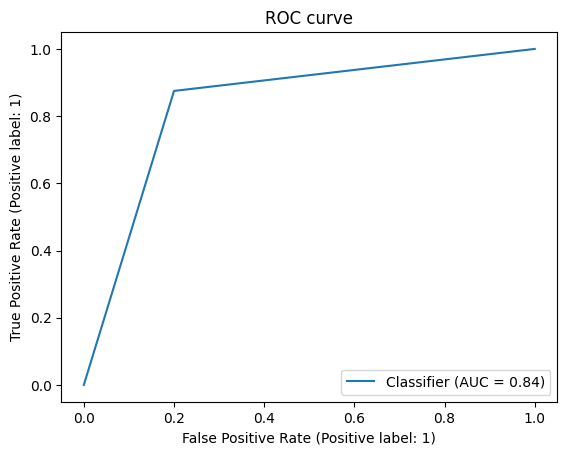

In [24]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

# precision recall curve
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.title('precision recall curve')

# ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title('ROC curve')
plt.show()

Final prediction of a patient with the following features

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [25]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [34]:
# prediction on the patient's features
print(f"Likelihood of the patient having the heart disease: {grid_model.predict(patient)}")

# Expected Probability Per Class (Basically model should be extremely sure its in the 0 class)
print(f"Expected Probability Per Class: {grid_model.predict_proba(patient)}")

Likelihood of the patient having the heart disease: [0]
Expected Probability Per Class: [[1.00000000e+00 1.33406135e-18]]


*** The End ***